In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter
np.random.seed(42)


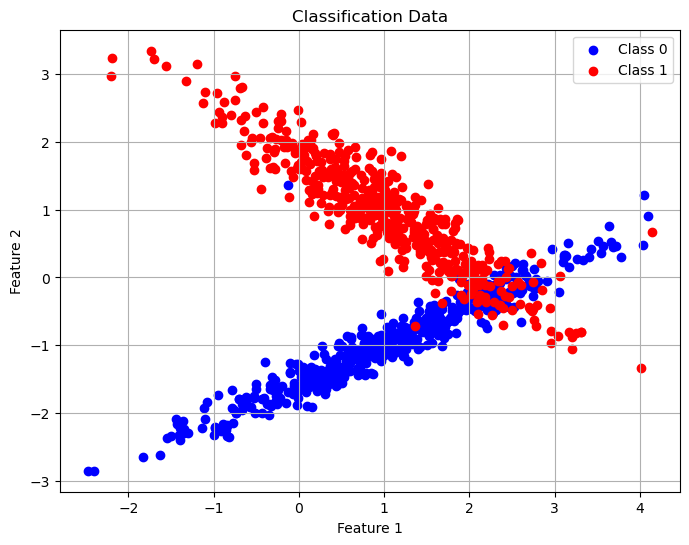

In [2]:
num_samples = 1000
num_features = 2
type = "classification"
if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X, y = gen.get_data()
plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)

In [3]:
# Gaussian naive Bayes

num_samples, num_features = X.shape
classes, class_counts = np.unique(y, return_counts=True)
num_classes = len(classes)

# Calculationg priors for each class
priors = class_counts / num_samples
print("Priors:", priors)
print("-"*50)


# Calculating mean and variance values of the features for each class
mean = [] # shape-> num_classes, num_features
var = [] # shape-> num_classes, num_features

for idx, cls in enumerate(classes):
    X_for_class = X[y == cls]
    mean_for_class = np.mean(X_for_class, axis=0)
    var_for_class = np.var(X_for_class, axis=0)
    mean.append(mean_for_class)
    var.append(var_for_class)

    # mean[idx,:] = mean_for_class
    # var[idx,:] = var_for_class

    print(f"Mean and variance values of the features for class=={cls} ")
    print("Mean:", mean_for_class)
    print("Var:", var_for_class)
    print("-"*50)
    
mean

Priors: [0.501 0.499]
--------------------------------------------------
Mean and variance values of the features for class==0 
Mean: [ 1.02136218 -0.97162287]
Var: [1.36872718 0.48337602]
--------------------------------------------------
Mean and variance values of the features for class==1 
Mean: [1.03033502 0.95008006]
Var: [0.92408715 0.67063396]
--------------------------------------------------


[array([ 1.02136218, -0.97162287]), array([1.03033502, 0.95008006])]

In [4]:
predictions = []
for x in X:
    posteriors = []
    for idx, cls in enumerate(classes):
        prior_ = priors[idx]
        mean_ = mean[idx]
        var_ = var[idx]
        likelihoods_ = 1 / (np.sqrt(2 * np.pi) * var_) * np.exp(-0.5 * (x - mean_)** 2 / var_)
        posterior = np.prod(likelihoods_)
        # posterior = np.sum(likelihoods_)
        posterior = prior_ + posterior
        posteriors.append(posterior)
    prediction = np.argmax(posteriors)
    predictions.append(prediction)
    
predictions = np.array(predictions)   

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.902